<a href="https://colab.research.google.com/github/GertkingABP/MOIAD_LABS/blob/main/lab4/MOIAD_L4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt






In [11]:
df = pd.read_csv("garments_worker_productivity.csv", delimiter=',')
df.head(5)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [12]:
#Удалим текстовые поля и поле с датой
df = df.drop(['date', 'quarter', 'department', 'day'], axis=1)


In [13]:
#Удалим пустые строки 
df = df.dropna()
df.shape

(691, 11)

In [14]:
#Копия обрпаботанных данных
copy__df = df 

In [16]:
copy__df.head(5)

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,8,0.8,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
2,11,0.8,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,12,0.8,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,6,0.8,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,7,0.8,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125


**Основные этапы**

In [17]:
X = copy__df.drop('actual_productivity', axis=1)
y = copy__df['actual_productivity']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Метод главных компонент (PCA) и график кумулятивной доли, объясненной дисперсии для определения количества главных компонент, которые необходимо оставить

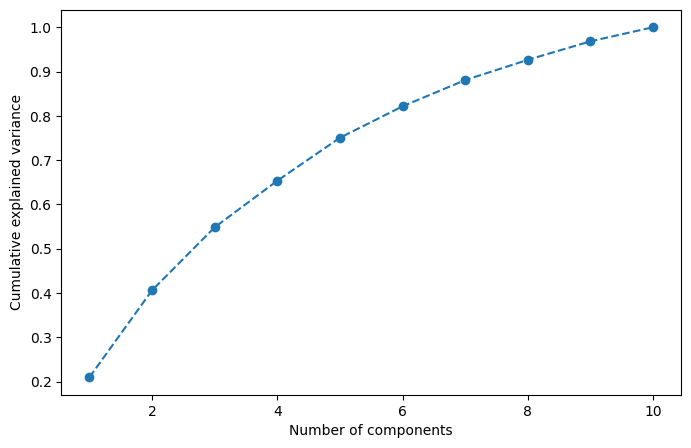

In [18]:
pca = PCA()
pca.fit(X_scaled)

var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cum_var_exp)+1), cum_var_exp, marker='o', linestyle='--')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

PCA с главными компонентами и выведем таблицу со значениями коэффициентов для каждого признака на каждой компоненте

In [20]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

loadings = pd.DataFrame(pca.components_, columns=X.columns)
loadings

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,0.446100,0.093612,-0.551915,-0.009587,-0.374847,-0.026171,-0.043638,-0.022260,-0.081130,-0.580820
1,0.109228,-0.425776,0.060088,-0.191981,-0.181348,-0.546208,0.328046,0.413773,0.395235,0.007278
2,-0.031007,0.327451,-0.025450,0.109465,0.011150,0.263971,0.629367,0.558258,-0.318683,0.008080
3,0.245138,-0.379530,-0.118492,-0.177054,0.640109,-0.191973,0.122778,-0.090981,-0.521102,-0.094782
4,0.034222,-0.302298,-0.120353,0.937922,0.069003,-0.057372,0.039577,0.002276,0.055475,0.023687
5,-0.798489,-0.351186,-0.322857,-0.100689,-0.129232,0.087217,0.099570,-0.049826,-0.121738,-0.270525
6,0.133649,-0.141690,-0.503658,-0.149910,0.320458,0.492080,0.101980,0.034049,0.516354,0.250801
7,0.230090,-0.468809,0.037360,-0.085548,-0.527174,0.321087,-0.001926,-0.049737,-0.368559,0.446364
8,0.069872,0.029922,0.171520,0.004109,-0.088878,0.025134,0.671965,-0.688647,0.147727,-0.093065
9,-0.116479,0.321272,-0.523339,0.008765,-0.082292,-0.487512,0.076701,-0.167367,-0.148063,0.555877


Анализ главных компонент на выбранных параметрах

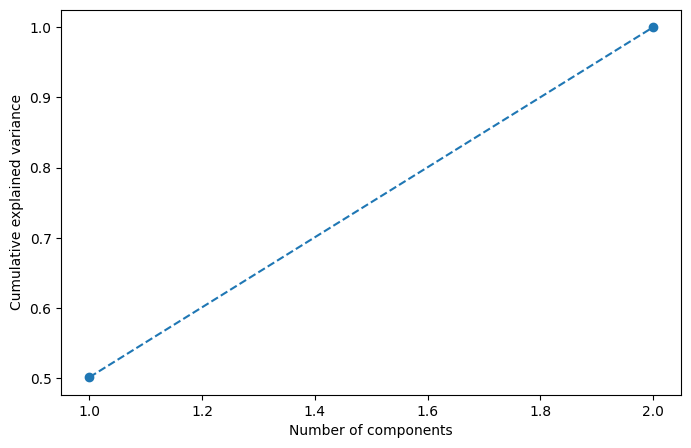

In [22]:
X_2 = df[['over_time', 'idle_time']]
y = df['idle_time']

scaler = StandardScaler()
X_2_scaled = scaler.fit_transform(X_2)

pca_2 = PCA()
pca_2.fit(X_2_scaled)

var_exp_2 = pca_2.explained_variance_ratio_
cum_var_exp_2 = np.cumsum(var_exp_2)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cum_var_exp_2)+1), cum_var_exp_2, marker='o', linestyle='--')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [23]:
#Оставили только 1 компоненту для дальнейшего анализа
pca_2 = PCA(n_components=1)
X_2_pca = pca_2.fit_transform(X_2_scaled)

loadings_2 = pd.DataFrame(pca_2.components_, columns=X_2.columns)
loadings_2

,over_time,idle_time
0,-0.707107,0.707107
